1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [21]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [22]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [23]:
dataframe=dataframe.drop(dataframe[dataframe.clase==1].index)

In [29]:
dataframe=dataframe
dataframe


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [33]:
# tenemos 130mfilas
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,97.180708,2.069231,9.053846,30.769231,0.676923
std,198.611241,1.629136,10.098976,47.961150,0.950034
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,6.000000,0.000000
50%,12.000000,1.000000,6.000000,15.000000,0.000000
75%,65.250000,2.000000,12.000000,35.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [31]:
print(dataframe.groupby('clase').size())

clase
0    86
2    44
dtype: int64


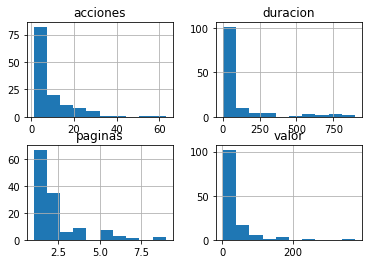

In [34]:
# Borramos la columna clase y hacemos un histograma de las variables.  
#La mayoría de los datos de paginas están entre 0 y 10, de duración muy cerca de 0, de página entre o y 2,5 y de valor cercanos a 0
dataframe.drop(['clase'], 1).hist()
plt.show()

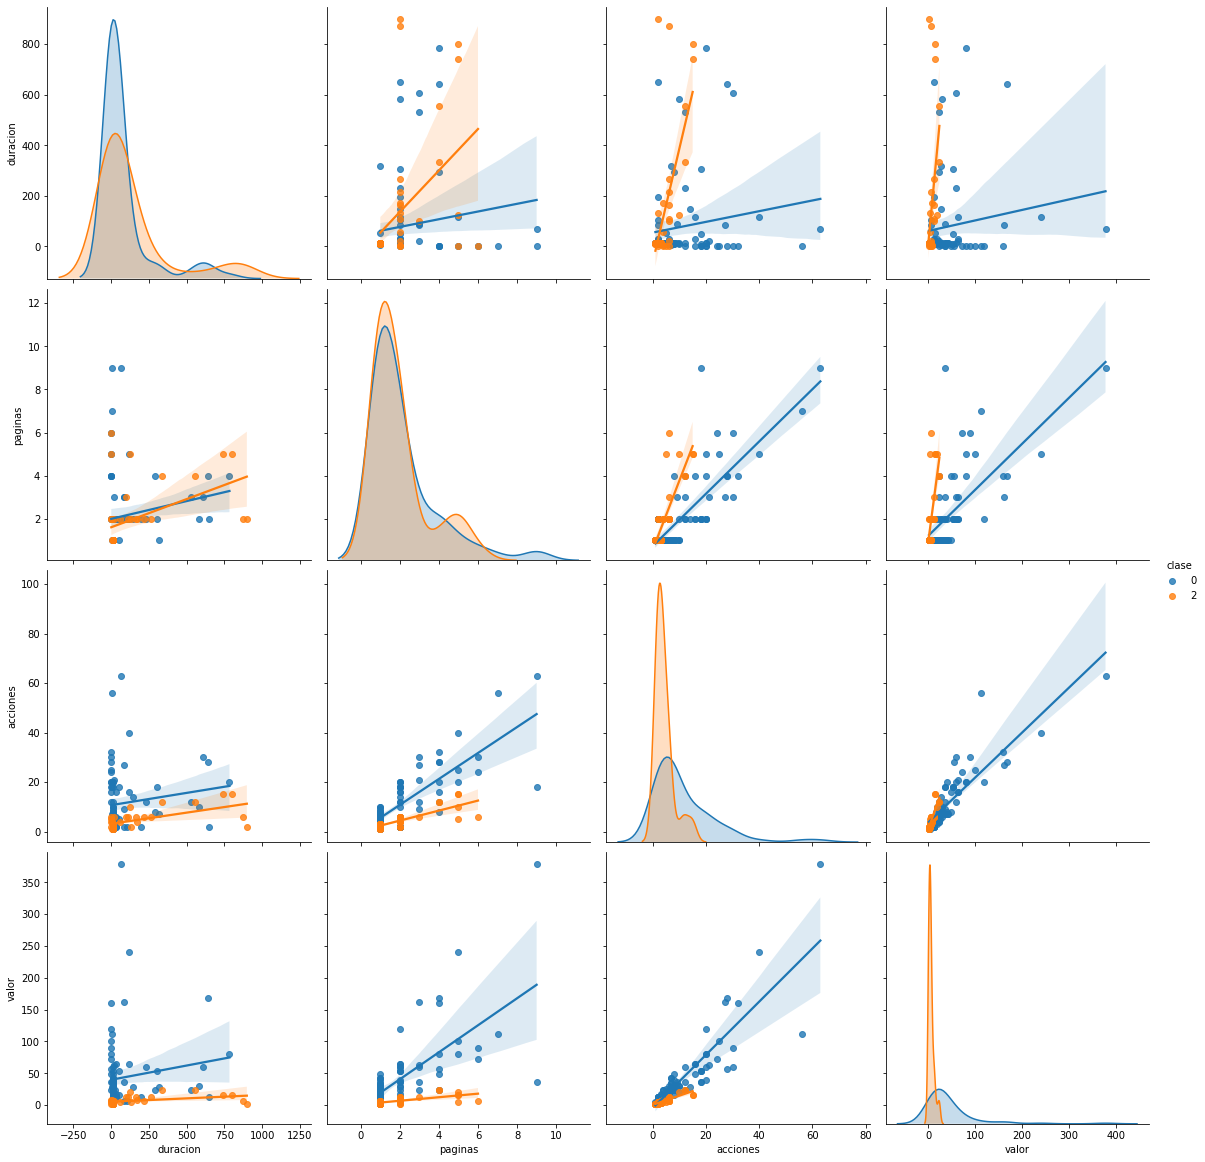

In [35]:
# Borramos nulos y muestra todos los datos relacionados con el target clase. Kind nos muestra la línea de la regresión lineal
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal

In [36]:
# Borramos la columna clase que es el target  
dataframe.drop(['clase'], 1)

,duracion,paginas,acciones,valor
0,7.0,2,4,8
1,21.0,2,6,6
2,57.0,2,4,4
3,101.0,3,6,12
4,109.0,2,6,12
...,...,...,...,...
165,13.0,1,7,42
166,12.0,1,2,6
167,13.0,1,3,9
168,13.0,1,7,28


In [37]:
#Sacamos nuestra X e y
X = np.array(dataframe.drop(['clase'], 1))
y = np.array(dataframe['clase'])
X.shape

(130, 4)

In [39]:
#pasamos nuestros datos a nuestro modelo y lo entrenamos
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [40]:
#Nuestro modelo predice las clases==los sistemas operativos que hay
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [42]:
#Nos da un porcentaje de acierto del 95%
model.score(X,y)

0.9538461538461539

In [ ]:
#VALIDACION DEL MODELO#
#QUIERO % DE ACIERTOS POR ITERACION,MEDIA DE ACIERTOS DEL CONJUNTO,DESVIACION STANDART

In [47]:
#TOMO 20% PARA CONJUNTO DE TEST
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [44]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.81818182 0.81818182 1.         0.81818182 1.         0.9
 1.         1.         1.         0.9       ]
Logistic Regression: 0.925455 (0.079752)


In [46]:
#DESVIACION STANDART(0.079752)
#MEDIA DE ACIERTOS 0.925455
#ACIERTOS PARA CADA ITERACION [0.81818182 0.81818182 1.         0.81818182 1.         0.9
 #1.         1.         1.         0.9       ]

In [48]:
# LO ENTENAMOS CON EL CONJUNTO DE TEST---------------96% ACIERTO
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.9615384615384616


In [49]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 96.15 %
Error: 3.85 %


In [50]:
Y_test.shape

(26,)

In [51]:
print(confusion_matrix(Y_test, predictions))

[[22  1]
 [ 0  3]]


In [ ]:
#DE 26 VECES QUE PUEDE ACERTAR MÁXIMO SOLAMENTE FALLA UNA VEZ. CUANDO LO HICIMOS CON LAS TRES CLASES VALOR INCLUYENDO EL UNO FALLABA 5 VECES PARA UN MAXIMO DE 34 ACIERTOS